<a href="https://colab.research.google.com/github/danielegilardi/TTR_project/blob/main/Copy_of_TTR_progetto_multiclassSVM_PCA_100_da_neurali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classificatore: SVM

Features: estratte con PCA (primi 100 autovalori) da features estratte con resnet 50 (non normalizzate)

In [1]:
!wget https://www.dropbox.com/s/fujohdyubk7mofr/features_PCA_100_da_neurali.zip?dl=0
!unzip features_PCA_100_da_neurali.zip?dl=0

!wget https://www.dropbox.com/s/rhbde9gw8vnk9dm/array_labels.zip?dl=0
!unzip array_labels.zip?dl=0

--2022-05-11 23:14:06--  https://www.dropbox.com/s/fujohdyubk7mofr/features_PCA_100_da_neurali.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/fujohdyubk7mofr/features_PCA_100_da_neurali.zip [following]
--2022-05-11 23:14:06--  https://www.dropbox.com/s/raw/fujohdyubk7mofr/features_PCA_100_da_neurali.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc83086fb0f3c40bcabcf8dd722c.dl.dropboxusercontent.com/cd/0/inline/BlH1BNIfoIEt5_I-CijYDMGZuPVHNkdyvik9vdgQFBiiZOCg4A64cg4PUlzzXpKrVkX9FpSjgbFrvaiXAvci0b5I3E1N6lr06RM8lA6XCc1cGA_6Q2y_LY5kv_OHciROAAwGZdeQ07829ifJo47WmqZ90p1rTrLiGEeU_eaWyoHoWA/file# [following]
--2022-05-11 23:14:06--  https://uc83086fb0f3c40bcabcf8dd722c.dl.dropboxusercontent.com/cd/0/inline/BlH1BN

In [2]:
# Versione one-vs-rest del classificatore SVM per distinguere le classi del dataset FER_modified
# Vengono usate le features trovate tramite PCA da features da resnet50

import numpy as np

# 1. Carico in memoria il dataset
x_train = np.load('features_PCA_100_da_neurali/features_train_PCA_100_da_neurali.npy')
y_train = np.load('array_labels/array_train_labels.npy')

x_test = np.load('features_PCA_100_da_neurali/features_test_PCA_100_da_neurali.npy')
y_test = np.load('array_labels/array_test_labels.npy')

In [ ]:
print("np.shape(x_train): ")
print(np.shape(x_train))
print("np.shape(y_train): ")
print(np.shape(y_train))
print("np.shape(x_test): ")
print(np.shape(x_test))
print("np.shape(y_test): ")
print(np.shape(y_test))
print(x_train[2])
print(x_test[2])
print(y_train)
print(y_test)

np.shape(x_train): 
(31805, 100)
np.shape(y_train): 
(31805,)
np.shape(x_test): 
(7178, 100)
np.shape(y_test): 
(7178,)
[12.34073204 -2.78026266  6.50642826 -5.42848475  0.73162059  4.74263074
 -4.54197456  2.72113499  1.56161869  5.91566907 -3.06627726  9.53574009
  3.48610719 -1.88480091  0.1642171  -1.14962492 -2.76322971 -7.08905347
  4.90810658  0.74915813  1.88902393  0.29762309 -6.6557073   0.68981535
  3.05040325  2.74565171  2.8077241  -2.27709722 -2.89581871  0.36836621
  2.0200143   1.08690611  0.8212788   3.92165684  0.31315094 -0.704273
 -2.8011148  -3.48366099 -0.86510371  2.82890136 -2.43990451 -0.52937879
  2.21166578 -1.11659575  3.83974498  3.43999072  1.62131486  2.45591836
  2.77249811  1.23647665 -2.89511088  0.56481752 -1.02833688  1.01989642
 -2.28983411 -5.88779839  0.53029099  0.45195429 -0.94617264 -1.18368264
 -1.92372986  1.89241639  3.29274985  0.99141481  3.74391133  1.57375719
  1.58786278  1.53247249 -0.16812576 -2.37696401  0.15384459  0.45649818
 -0.92

31805 100


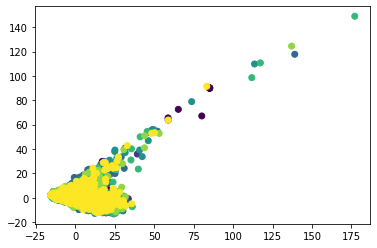

In [3]:
# Analizzo i dati

# Capisco quanti oggetti e feature ho
nobj = x_train.shape[0]
nfeat = x_train.shape[1]
print(nobj, nfeat)

# Capisco come sono i dati: scatter plot con le prime 2 features
from matplotlib import pyplot as plt

plt.scatter(x_train[:,0],x_train[:,1], c=y_train)
plt.show()


In [4]:
from sklearn.svm import SVC

# Inizializzo i parametri
kernel = 'rbf'
#degree = 5
#probability = True
# class_weight = dict or ‘balanced’, default=None
decision_function_shape = 'ovr'

max_iteration = 10000

# Inizializzo un modello di classificazione SVM per ognuna delle 7 classi
models = [SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True)]

In [5]:
# Addestro i modelli
for i in range(7):
  models[i].fit(x_train, y_train==i)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_it

In [6]:
# Classifico i dati del testing set
predicted_scores = []
for i in range(7):
  predicted_scores.append(models[i].predict_proba(x_test)[:,1])

predicted_scores = np.asarray(predicted_scores)
predicted = np.argmax(predicted_scores,axis=0)

print(np.shape(predicted_scores))
print(np.shape(predicted))
print(predicted_scores[:7])
print(predicted[:20])

(7, 7178)
(7178,)
[[0.33803819 0.26047483 0.11665379 ... 0.12244204 0.10117107 0.14840036]
 [0.01146006 0.00250049 0.00661018 ... 0.01134377 0.00994047 0.02050959]
 [0.15671739 0.08522228 0.1440783  ... 0.11097383 0.19311054 0.15025462]
 ...
 [0.12936429 0.13784001 0.2082661  ... 0.12242482 0.16247145 0.12706039]
 [0.18601    0.14918842 0.12984677 ... 0.13308688 0.21141591 0.14023535]
 [0.04105303 0.05666406 0.1280258  ... 0.11276937 0.17002927 0.07386915]]
[0 0 3 0 3 0 0 3 0 3 0 3 3 3 3 0 3 3 0 0]


In [11]:
# matrice di confusione

cmc = np.zeros((7,7))

for pr,y_te in zip(predicted,y_test):
  cmc[y_te,pr] += 1.0

In [8]:
# calcolo accuratezza, precision e recall media rispetto alle 7 classi

accuracy = np.sum(cmc.diagonal())/np.sum(cmc)

precision = []
recall = []
for i in range(7):
  precision.append(cmc[i,i]/ np.sum(cmc[:,i]))
  recall.append(cmc[i,i]/ np.sum(cmc[i,:]))

precision = np.asarray(precision)
recall  = np.asarray(recall)

print(np.shape(precision))
print(np.shape(recall))

precision_m = np.mean(precision)
recall_m = np.mean(recall)

print(np.shape(precision_m))
print(np.shape(recall_m))
print(precision_m)
print(recall_m)

print('Accuratezza del classificatore: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Precisione media del classificatore: ' + "{0:.2f}".format(precision_m))
print('Recall media del classificatore: ' + "{0:.2f}".format(recall_m))

(7,)
(7,)
()
()
0.7329662921592924
0.45657892005357464
Accuratezza del classificatore: 49.09%
Precisione media del classificatore: 0.73
Recall media del classificatore: 0.46


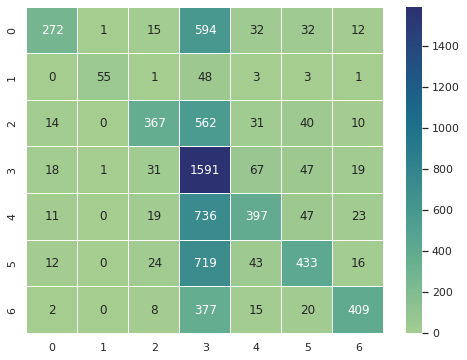

In [9]:
import seaborn as sns; 


plt.rcParams["figure.figsize"] = (8,6)
sns.set_theme()

ax = sns.heatmap(cmc, annot=True,fmt=".0f", linewidths=.1, cmap="crest")
#ax = sns.heatmap(cmc, linewidths=.3)
#ax = sns.heatmap(cmc, cmap="YlGnBu")


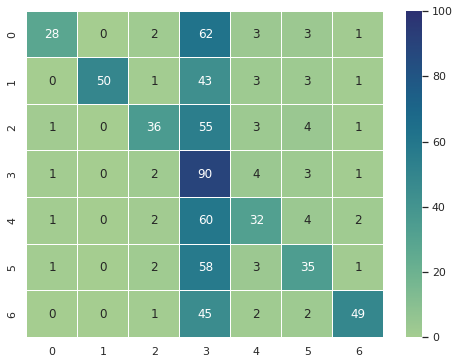

In [10]:
# ATTENZIONE, con questo codice vengono cambiati i valori della matrice cmc
# viene fatto solo per plottare con le percentuali per ogni riga
# poi riaggiornare la matrice di confusione

cmc2 = cmc

for i in range(7):
  total = 0
  for j in range(7):
    total += cmc[i,j]
  for j in range(7):
    cmc2[i,j] = cmc[i,j]*100/total
  
plt.rcParams["figure.figsize"] = (8,6)
sns.set_theme()

ax = sns.heatmap(cmc2, annot=True,vmin=0.0, vmax=100.0,fmt=".0f", linewidths=.1, cmap="crest")
#ax = sns.heatmap(cmc, linewidths=.3)
#ax = sns.heatmap(cmc, cmap="YlGnBu")